In [0]:
import numpy as np
import pandas as pd
import cv2 
import os 
import tensorflow as tf
from PIL import Image

### load dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Training set contains 60000 28x28 images, test set contains 10000 28x28 images

In [3]:
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)


### Flattening image arrays 28x28 to 784

In [0]:
X_train = x_train.reshape(len(x_train), 784)
X_test = x_test.reshape(len(x_test), 784)

In [0]:
from sklearn.linear_model import LogisticRegression

### Define linear regression model

In [0]:
logisticRegr = LogisticRegression(max_iter = 500, n_jobs = 6, solver = 'lbfgs', multi_class = 'auto')

### Cross Validation

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [9]:
cv = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_val_score(logisticRegr, X_train, y_train, cv=cv)
scores

array([0.911     , 0.90806667, 0.91246667, 0.91066667, 0.91213333])

In [10]:
print(f'mean: {scores.mean()}, Standard Deveation: {scores.std()}')

mean: 0.9108666666666666, Standard Deveation: 0.0015532045726318288


### Fit training data

In [11]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=6, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict labels on testset

In [0]:
predictions = logisticRegr.predict(X_test)

In [13]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9226


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.86      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [15]:
import seaborn as sns
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Create confusion matrix and visualize

In [0]:
cm = metrics.confusion_matrix(y_test, predictions)

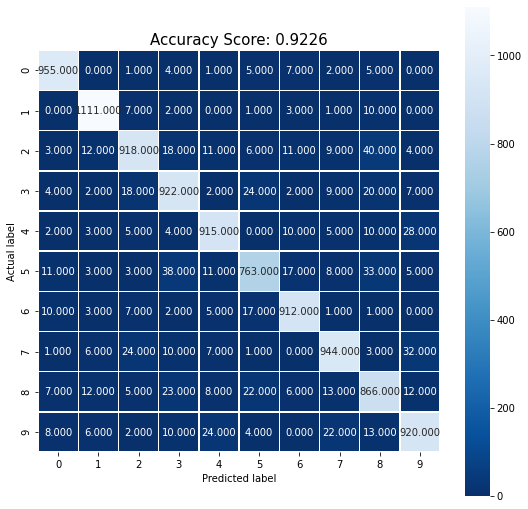

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()